<a href="https://colab.research.google.com/github/Anidafio/4105_hw4/blob/main/hw4_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Anidafio/4105_hw4/main/Housing.csv'

housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [114]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

X = housing.iloc[:, 1:12].values
Y = housing.iloc[:, 0].values

#split train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

#standard scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

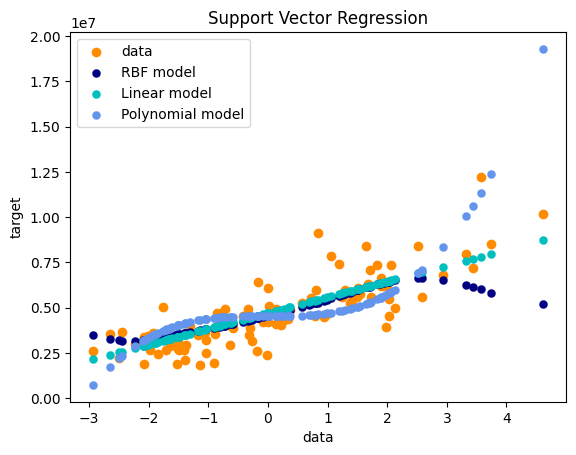

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e5, gamma='auto')
svr_lin = SVR(kernel='linear', C=1e5)
svr_poly = SVR(kernel='poly', C=1e5, degree=3)
y_rbf = svr_rbf.fit(X_train_pca, Y_train).predict(X_test_pca)
y_lin = svr_lin.fit(X_train_pca, Y_train).predict(X_test_pca)
y_poly = svr_poly.fit(X_train_pca, Y_train).predict(X_test_pca)

# #############################################################################
# Look at the results
lw = 0.1
plt.scatter(X_test_pca, Y_test, color='darkorange', label='data')
plt.scatter(X_test_pca, y_rbf, color='navy', lw=lw, label='RBF model')
plt.scatter(X_test_pca, y_lin, color='c', lw=lw, label='Linear model')
plt.scatter(X_test_pca, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


Optimum number of principal components (k) for rbf: 4
Optimum number of principal components (k) for linear: 11
Optimum number of principal components (k) for poly: 7


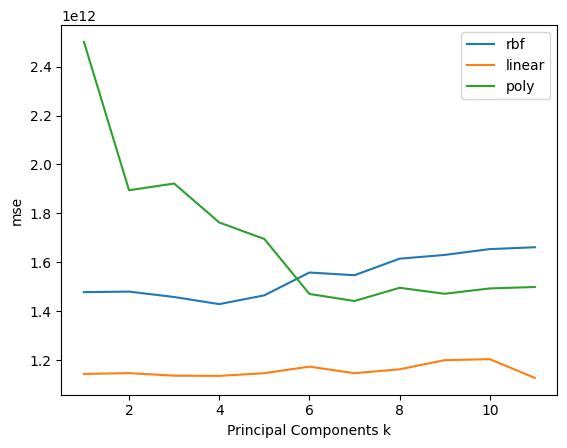

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

k_vals = np.arange(1, X_train.shape[1] + 1)

accuracy_scores_rbf = []
accuracy_scores_linear = []
accuracy_scores_poly = []

for k in k_vals:
  #pca
  pca = PCA(n_components = k)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  svr_rbf = SVR(kernel='rbf', C=1e5)
  svr_lin = SVR(kernel='linear', C=1e5)
  svr_poly = SVR(kernel='poly', C=1e5, degree=3)
  y_rbf = svr_rbf.fit(X_train_pca, Y_train).predict(X_test_pca)
  y_lin = svr_lin.fit(X_train_pca, Y_train).predict(X_test_pca)
  y_poly = svr_poly.fit(X_train_pca, Y_train).predict(X_test_pca)

  #scores
  mse_rbf = mean_squared_error(Y_test, y_rbf)
  mse_linear = mean_squared_error(Y_test, y_lin)
  mse_poly = mean_squared_error(Y_test, y_poly)

  accuracy_scores_rbf.append(mse_rbf)
  accuracy_scores_linear.append(mse_linear)
  accuracy_scores_poly.append(mse_poly)

# optimum number of principal components (k)
optimal_k = k_vals[np.argmin(accuracy_scores_rbf)]
print("Optimum number of principal components (k) for rbf:", optimal_k)
optimal_k = k_vals[np.argmin(accuracy_scores_linear)]
print("Optimum number of principal components (k) for linear:", optimal_k)
optimal_k = k_vals[np.argmin(accuracy_scores_poly)]
print("Optimum number of principal components (k) for poly:", optimal_k)

# plot
plt.plot(k_vals, accuracy_scores_rbf, label='rbf')
plt.plot(k_vals, accuracy_scores_linear, label='linear')
plt.plot(k_vals, accuracy_scores_poly, label='poly')
plt.xlabel('Principal Components k')
plt.ylabel('mse')
plt.legend()
plt.show()